# Quaternions as geometric objects

## Introduction

To get a handle on quaternions, it's nice to start thinking about things that are probably fairly intuitive.  For instance, we know that imaginary numbers are a convenient way of talking about two dimensions at a time.  So $c = a + bi$ can be geometrically interpreted as a point $(a,b)$ on a plane.  If we restrict this to $\sqrt{a^2 + b^2} = 1$ then all such points lie on the unit circle.

In [1]:
%pylab inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


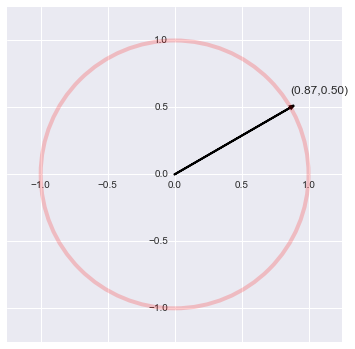

In [2]:
import seaborn as sns

angle = np.pi/6 #in radians
c = np.cos(angle) + np.sin(angle)*1j

plt.figure(figsize=(6,6))
plt.arrow(0,0,c.real,c.imag,lw=2)
circle1=plt.Circle((0,0),1,lw=4,alpha=.2,fill=False,color='r')
plt.gcf().gca().add_artist(circle1)
plt.text(c.real, c.imag+.1, '(%1.2f,%1.2f)'%(c.real, c.imag), fontsize=12)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
sns.despine(offset=-168)
sns.set_style("white")

So there we are, using imaginary numbers to indicate an orientation is something we already do in 2 dimensions.  Because we've restricted this to be on a unit circle, $c$ is telling us which angle we've rotated through to get to that point.

Even better (because it's also not mysterious), we also use complex numbers to specify rotations in 2D.  For instance, if I want to rotate a complex number by 45 degrees, I can define a 'rotater' vector $r = \frac{\sqrt{2}}{2} + \frac{\sqrt{2}}{2}i$, which is just the unit vector that is rotated by 45 degrees from horizontal (pointing right), i.e. $1 + 0i$ or $(1,0)$. 

So, what do we do with our rotater?  Simply multiply. So $c*r$ is a new imaginary number that is rotated 45 counterclockwise from $c$.

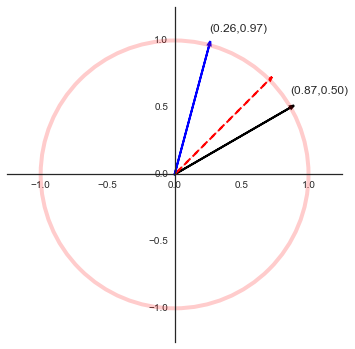

In [3]:
angle = np.pi/6 #in radians
c = np.cos(angle) + np.sin(angle)*1j

#rotator
r = np.sqrt(2)/2 + np.sqrt(2)/2*1j

result = c*r

plt.figure(figsize=(6,6))
plt.arrow(0,0,c.real,c.imag,lw=2,color='k')
plt.arrow(0,0,r.real,r.imag,lw=2,color='r', linestyle='--')
plt.arrow(0,0,result.real,result.imag,lw=2,color='b')

circle1=plt.Circle((0,0),1,lw=4,alpha=.2,fill=False,color='r')
plt.gcf().gca().add_artist(circle1)
plt.text(c.real, c.imag+.1, '(%1.2f,%1.2f)'%(c.real, c.imag), fontsize=12)
plt.text(result.real, result.imag+.1, '(%1.2f,%1.2f)'%(result.real, result.imag), fontsize=12)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
sns.despine(offset=-168)
sns.set_style("white")

So that establishes a bit of a baseline for what we already know:
1. we can interpret imaginary numbers as geometric objects indicating angles of rotation
2. we can interpret imaginary numbers as rotations
3. we can apply rotations with multiplication

Also remember that Euler's formula (which I used in the code above), links 'pure' complex numbers with sines and cosines, as well as complex numbers with real and imaginary parts:

$e^{i\omega}=\cos(\omega)+i\sin(\omega)$

## Quaternions

In the above context, quaternions are pretty much the same thing for three dimensions, instead of two. Interestingly, we need a four dimensional vector (instead of 2) to capture 3D rotations, because *math*.  So we write quaternions as:

$q = w +xi + yj +zk$

We can easiliy identify every 3D vector with such $q$ by simply setting $w=0$, and off we go (i.e. there will be one quaternion for each 3D vector). 

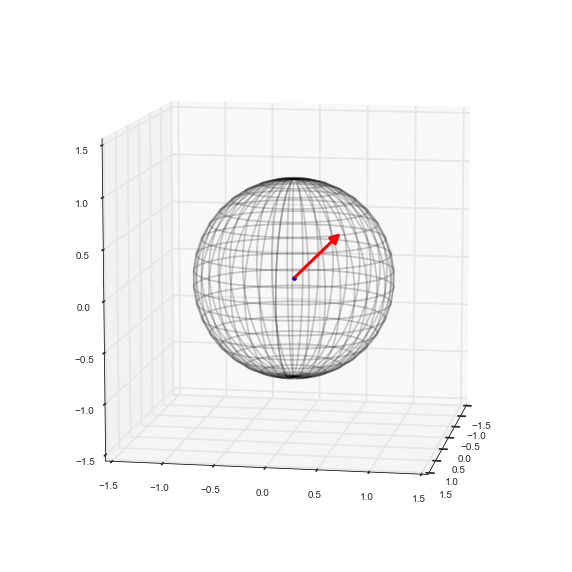

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')       
        
#draw sphere
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=.2)

ax.view_init(elev = 10, azim = 10)

#draw the centre
ax.scatter([0],[0],[0],color="b",s=20)

######Part that matters

#define a quaternion for any vector
#q = w + xi + yj + zk
q = [0, np.sqrt(3)/3, np.sqrt(3)/3, np.sqrt(3)/3]

a = Arrow3D([0,q[1]], [0,q[2]], [0,q[3]],
                mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a);

 But note that this doesn't define rotations because these 3 numbers don't account for the 'roll' of the vector around its own axis.  That is essentially why we need 4 numbers in quaternions.  Three (imaginary) numbers for the axis and one (real) number for the 'roll'.

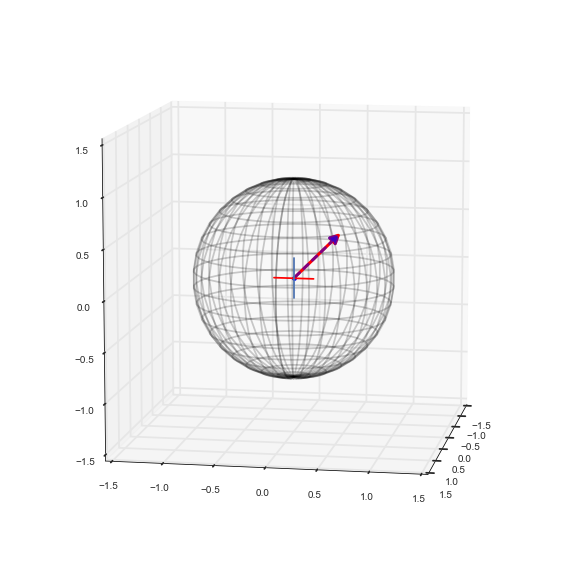

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')       
        
#draw sphere
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=.2)

ax.view_init(elev = 10, azim = 10)

#draw the centre
ax.scatter([0],[0],[0],color="b",s=20)

#Define quaternion multiplication
def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

#Define quaternion conjugate
def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

######Part that matters

#define a quaternion 
q1 = [0, np.sqrt(3)/3, np.sqrt(3)/3, np.sqrt(3)/3]

#define a quaternion to rotate by 90 degrees around the axis
q2 = [np.sqrt(2)/2, np.sqrt(6)/6, np.sqrt(6)/6, np.sqrt(6)/6]

#rotate the first vector with the 2nd using quaternion multiply
v = q_mult(q_mult(q2, q1), q_conjugate(q2))[1:] 

#Draw the vector part
a = Arrow3D([0,q[1]], [0,q[2]], [0,q[3]],
                mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)
#Plot the 'roll'
ax.plot([0,0],[-.2,.2],[0,0], color='r')

#Draw the vector part
b = Arrow3D([0, v[0]], [0,v[1]], [0,v[2]],
                mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="b", alpha=.5,linestyle='--')
ax.add_artist(b)
#Plot the 'roll'
ax.plot([0,0],[0,0],[-.2,.2])

<table style="width:30%" style="border: 1px solid black">
<tr><td><img src=Euler_AxisAngle.png></td></tr>
<tr><td>Figure: The Euler axis (e) is the vector part of the quaternion and the rotation ($\theta$) is the real part</td></tr>
</table>

Relatedly,  Euler showed (with his [rotation theorem](https://en.wikipedia.org/wiki/Euler%27s_rotation_theorem)) that any rotation of a 3D object can be defined in terms of an axis (the Euler axis) and a rotation (see figure).  So, unsurprisingly, quaternions are that axis (the imaginary, vector part) and rotation (the real part).

When thinking about quaternions, it's *super important* to keep in mind that you are not rotating a vector (because vectors don't have a 'roll'), you're really rotating a set of axes or frame of reference (aligned with the vector along the frame's $x$ axis).  I think this is the part that can throw people off the most.  

<table style="width:30%" style="border: 1px solid black">
<tr><td><img src=rotate_reference.jpeg></td></tr>
<tr><td>Figure: Rotating a frame of reference.  Notice that if you think of Z as a vector being rotated by $\alpha$ then it doesn't actually change that vector much when going to Z'.  However, any other vector not equal to Z will in fact change.  For instance, Y and X change quite a bit into Y' and X'.</td></tr>
</table>

This means that you can't think of the vector part of a quaternion as simply the vector orthogonal to the starting and ending vectors of a rotation, as shown in the figure below. As you can imagine, this finds the shortest path between two vectors, but there are other rotations that can take you from one vector to the other (any path that lies on the surface of a sphere containing the two vectors). 

<table style="width:40%" style="border: 1px solid black">
<tr><td><img src=vector_rotate.png></td></tr>
<tr><td>Figure: NOT (necessarily) A QUATERNION!  It might be tempting to think that $e$ is the vector part of a quaternion, but that is incorrect. The green vector is the orthogonal axis that you would rotate the red starting vector around by $\theta$ to get to the blue vector.  However, this is not the quaternion, because this characterization ignores the 'roll' of the vectors (see previous figure).</td></tr>
</table>

Instead of what is in the above figure, it's better to think of a quaternion as the vector that, when the starting *axes* are rotated around it, you end up aligned with the ending *axes* (see below).  The reason this is important is because when you think of it this way, it's clearer why a whole *set* of points can be moved by the same quaternion (if you think of it the other way, you have a different orthogonal axis for each point).  Refering to the figure, imagine a sphere around the first axes.  Only those points that lie on its 'equator' will move the shortest path they can to get to their final position. Everything else will take a more curved route than is necessary to actually map just that starting vector onto its final position.

<table style="width:30%" style="border: 1px solid black">
<tr><td><img src=axes.png></td></tr>
<tr><td>Figure: Quaternion rotation. The black line is the Euler axis, and you can see the axes rotating around it. As you can imagine, depending which point you pick in the original frame, you can get very different paths during the rotation.</td></tr>
</table>

Keeping this in mind will make it more obvious why, when you multiply a quaternion by the unit vector (i.e., $v=[1,0,0]$), you *don't* get a vector that aligns with the quaternion (in general), unlike with 2D imaginary numbers.  Instead, it follows an arc around that quaternion, and stops after it has gone however far you told it to go.

That's about it.  There are lots of places to find out about the 'math' of quaternions.  E.g. how to multiply them (which I did in the code above) to generate a rotation, etc. for instance, in [wikipedia](https://en.wikipedia.org/wiki/Quaternion).

One final note, a form of Euler's formula also holds here, where $r=[xi+yj+zk]$ and $\omega=\theta/2$ ($\theta$ is how far you want to rotate about $r$ as in the 2D case):

$e^{\omega r} =  \cos(\omega) + r\sin(\omega)$

This is used to convert back and forth between axis-angle representations and quaternion representations.